In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Number Game
#### Simplified Model
The following is a simplified version of Number Game. Given a number is generated from either even number hypothesis or odd number hypothesis within the range of $[1,10]$, when a number is given by the host, you have to guess which hypothesis is in his mind. (Of course, it is easy because we all know about the definition of even and odd number, but let's explain how our belief progresses before and after the data arrives)

##### Prior
Before the host is giving out a number, we all have a prior $p(h)$ about the probability of giving an even ($h_e$) or odd number ($h_o$), based on our prior knowledge about anything releveant the game, such as the host habit, previous game result, etc. 

Assume that we have no prior knowledge about the game, it is sensible to assign both hypothesises to equal prior $p(h_o)=p(h_e)=\frac{1}{2}$. 

##### Likelihood
Given a hypothesis, there is a likelihood $p(D|h)$ to observe a particular set of data. Since for each hypothesis, there are 5 candidates within the range (i.e. $\{1,3,5,7,9\}=h_o \cap [1,10]$ and $\{2,4,6,8,10\}=h_e \cap [1,10]$ ). Therefore, 
$$p(D|h)=\bigg[\frac{1}{size(h)}\bigg]^N=\bigg[\frac{1}{|h|}\bigg]^N=\frac{1}{5}$$

##### Posterior
If the host now gives you a number $7$, the posterior which is simply the likelihood times the prior becomes,
\begin{align*}
p(h_o|D)&=\frac{p(D|h_o)p(h_o)}{\sum_{h_o^\prime\in\mathcal{H}}p(D,h^\prime)}=\frac{\mathbb{I}(D\in h_o)/|h_o|^Np(h_o)}{\sum_{h'\in \mathcal{H}}\mathbb{I}(D\in h')/|h'|^Np(h')} \\
&= \frac{1\times0.2\times0.5}{1\times0.2\times0.5+0\times0.2\times0.5} = 1
\end{align*}
Now we are pretty sure about the hypothesis given the data because of the posterior probability. 
##### Maximum A Posterior (MAP) 
MAP estimate can be written as 
$$ \hat{h}^{MAP}=\arg\max_{h}p(D|h)p(h)=\arg\max\big[\log p(D|h)+\log p(h)\big]$$
##### Maximum likelihood estimate (MLE)
When we get more and more data, the MAP estimate converges towards the maximum likelihood estimate (MLE):
$$\hat{h}^{mle}\triangleq \arg\max_h p(D|h)=\arg\max_h \log p(D|h)$$
What if we guess the next number or the next number's hypothesis, this posterior can be reused as prior. 
##### Posterior predictive distribution
$$p(\hat{x}\in C|D) = \sum_h p(y=1|\hat{x},h)p(h|D)$$

In [2]:
def GuessHypothesis(number):
    prior = .5; pDh = .2;
    if np.remainder(number,2)==0:
        ie = 1
        io = 0
    elif np.remainder(number-1,2)==0:
        io = 1
        ie = 0
    po=io*pDh*prior/(io+ie)/pDh/prior
    pe=ie*pDh*prior/(io+ie)/pDh/prior
    return po,pe

In [3]:
po,pe = GuessHypothesis(7)

The posterior of odd number hypothesis given data $p(h_o|D)$

In [4]:
print('probability of odd number hypothesis given data: '+str(po))
print('probability of even number hypothesis given data: '+str(pe))

probability of odd number hypothesis given data: 1.0
probability of even number hypothesis given data: 0.0


#### Full Model
A subset of hypothesis space given the range of $[0,100]$ with equal prior,
1. square $\{1,4,9,16,25,36,49,64,81,100\}$ so $p(D|h_1) = \frac{1}{10}$
2. multiple of 2 $p(D|h_2) = \frac{1}{50}$
3. multiple of 4 $p(D|h_3) = \frac{1}{25}$

##### Posterior predictive distribution
$$p(\hat{x}\in C|D) = \sum_h p(y=1|\hat{x},h)p(h|D)=\sum_h p(\hat{x}|h)\delta_{\hat{h}}(h) = p(\hat{x}|\hat{h})$$

In [5]:
class NumberGame():
    def __init__(self,numseq):
        self.D = numseq
    def checkmultiple(self,n):
        rem = np.remainder(self.D,n)
        bol = (rem==0)
        return bol
    def checksquare(self):
        rem = np.remainder(np.log(self.D)/np.log(2),2)
        bol = (rem==0)
        return bol
    def computePosterior(self):
        bol1 = sum(self.checksquare())==len(self.D)
        bol2 = sum(self.checkmultiple(2))==len(self.D)
        bol3 = sum(self.checkmultiple(4))==len(self.D)
        denom=bol1/10+bol2/50+bol3/25
        p1 = bol1/10/denom
        p2 = bol2/50/denom
        p3 = bol3/25/denom
        return p1,p2,p3
    def computePredictive(self):
       
        Dall = np.linspace(1,100,100)
        p1,p2,p3=self.computePosterior()
        self.D = Dall
        bol1all = self.checksquare()
        bol2all = self.checkmultiple(2)
        bol3all = self.checkmultiple(4)
        p1all = p1*bol1all
        p2all = p2*bol2all
        p3all = p3*bol3all
        p = p1all+p2all+p3all
        return  p

Text(0, 0.5, 'posterior')

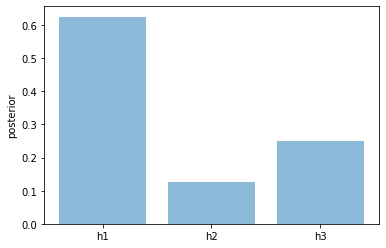

In [6]:
# Test case 
s = np.array([4,16,64])
ng = NumberGame(s)
objs = ('h1','h2','h3')
ypos = np.arange(len(objs))
plt.bar(ypos,ng.computePosterior(),align='center',alpha=.5)
plt.xticks(ypos, objs)
plt.ylabel('posterior')

<BarContainer object of 100 artists>

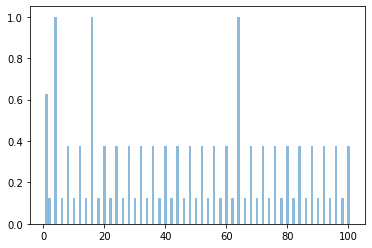

In [7]:
plt.bar(np.arange(1,101),ng.computePredictive(),align='center',alpha=.5)

Text(0, 0.5, 'posterior')

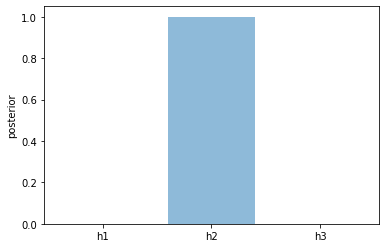

In [8]:
s = np.array([4,16,64,2])
ng = NumberGame(s)
objs = ('h1','h2','h3')
ypos = np.arange(len(objs))
plt.bar(ypos,ng.computePosterior(),align='center',alpha=.5)
plt.xticks(ypos, objs)
plt.ylabel('posterior')

<BarContainer object of 100 artists>

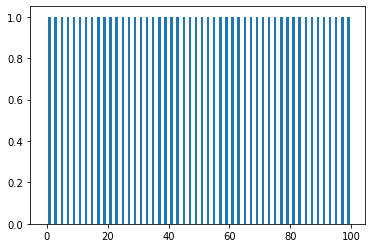

In [9]:
plt.bar(np.arange(100),ng.computePredictive())

Text(0, 0.5, 'posterior')

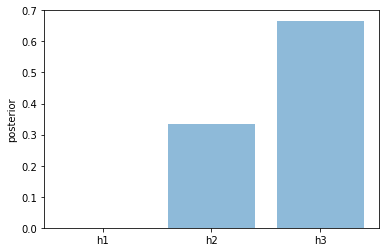

In [10]:
s = np.array([12])
ng = NumberGame(s)
objs = ('h1','h2','h3')
ypos = np.arange(len(objs))
plt.bar(ypos,ng.computePosterior(),align='center',alpha=.5)
plt.xticks(ypos, objs)
plt.ylabel('posterior')

<BarContainer object of 100 artists>

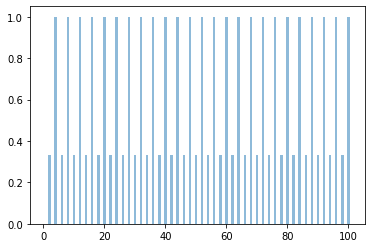

In [11]:
plt.bar(np.arange(1,101),ng.computePredictive(),align='center',alpha=.5)